<a href="https://colab.research.google.com/github/Suvasini911/StudyPal-AI/blob/main/Copy_of_Energy_Consumption_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving household_power_consumption.csv to household_power_consumption.csv


**LOAD & CLEAN DATA**

In [ ]:
import pandas as pd

df = pd.read_csv("household_power_consumption.csv", sep=',', low_memory=False)

df.replace('?', pd.NA, inplace=True)
df = df.dropna()

df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)

**FEATURE ENGINEERING**

In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month


/tmp/ipython-input-3274850218.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [ ]:
features = ['hour', 'day', 'month', 'Global_reactive_power']
X = df[features]
y = df['Global_active_power']


**TRAIN MULTIPLE MODELS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**Model 1: Linear Regression**

In [ ]:
start = time.time()
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_time = time.time() - start

lr_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)


**Model 2: Random Forest**

In [ ]:
start = time.time()
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)
rf_time = time.time() - start

rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)


In [ ]:
print("Linear Regression MAE:", lr_mae, "Training Time:", lr_time)
print("Random Forest MAE:", rf_mae, "Training Time:", rf_time)


Linear Regression MAE: 0.7944048528628547 Training Time: 0.30913424491882324
Random Forest MAE: 0.3286513410230784 Training Time: 146.18083310127258


**CARBON FOOTPRINT CALCULATOR**

In [ ]:
def calculate_carbon(units):
    emission_factor = 0.82  # kg CO2 per kWh
    return units * emission_factor


In [ ]:
sample_prediction = rf.predict([[10,15,6,0.3]])
carbon = calculate_carbon(sample_prediction[0])

print("Predicted Energy:", sample_prediction[0])
print("Estimated Carbon Emission:", carbon)


Predicted Energy: 0.9939933333333332
Estimated Carbon Emission: 0.8150745333333331


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**OPTIMIZATION ENGINE**

In [ ]:
def optimize_energy(units):
    if units > 5:
        return "High usage detected. Reduce AC hours and heavy appliances."
    elif units > 3:
        return "Moderate usage. Switch to LED and avoid standby power."
    else:
        return "Energy usage is optimal."


In [ ]:
optimize_energy(sample_prediction[0])


'Energy usage is optimal.'

**SAVE MODEL**

In [ ]:
import joblib
joblib.dump(rf, "energy_model.pkl")


['energy_model.pkl']

In [ ]:
files.download("energy_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ADD VISUALIZATION**

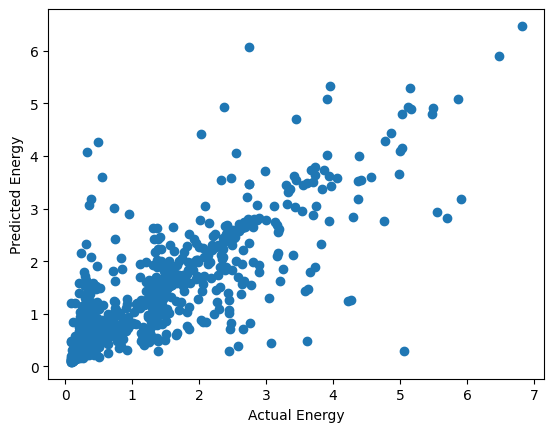

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test[:1000], rf_pred[:1000])
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.show()


**Energy Consumption Over Time**

/tmp/ipython-input-2256837426.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


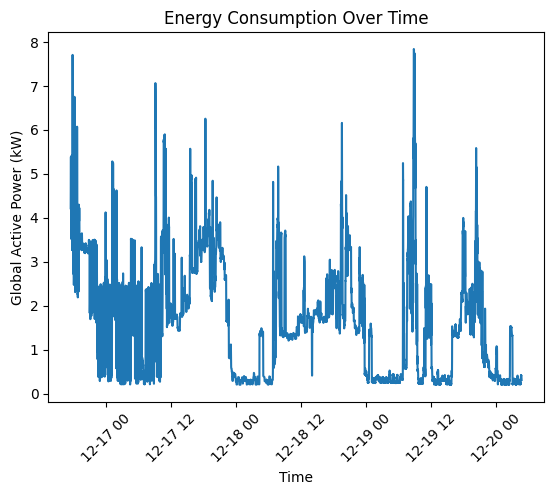

In [ ]:
import matplotlib.pyplot as plt

# Convert to datetime if not already done
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Take small sample (large dataset)
sample_df = df.iloc[:5000]

plt.figure()
plt.plot(sample_df['Datetime'], sample_df['Global_active_power'])
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("Energy Consumption Over Time")
plt.xticks(rotation=45)
plt.show()


**Hourly Average Energy Usage**

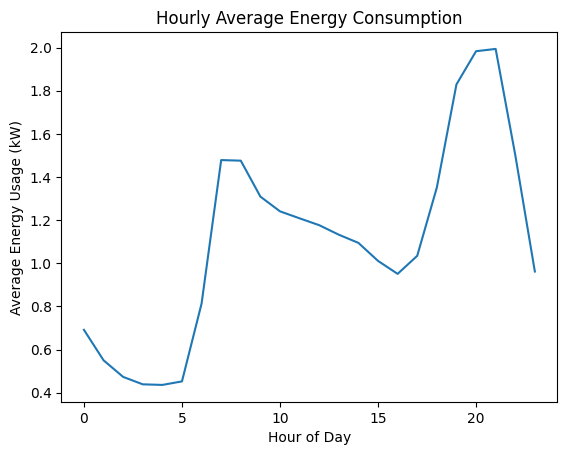

In [ ]:
hourly_avg = df.groupby('hour')['Global_active_power'].mean()

plt.figure()
plt.plot(hourly_avg.index, hourly_avg.values)
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Usage (kW)")
plt.title("Hourly Average Energy Consumption")
plt.show()


**Monthly Energy Trend**

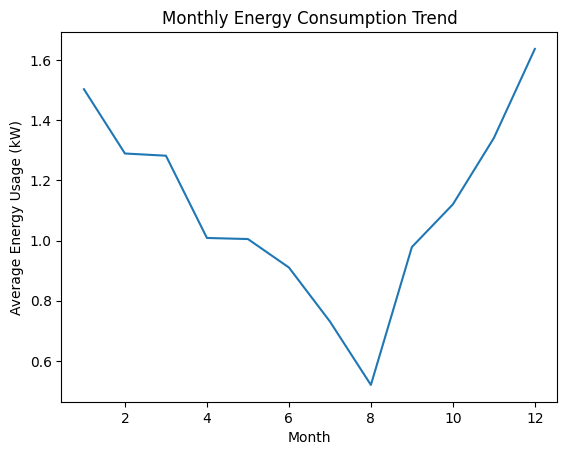

In [ ]:
monthly_avg = df.groupby('month')['Global_active_power'].mean()

plt.figure()
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel("Month")
plt.ylabel("Average Energy Usage (kW)")
plt.title("Monthly Energy Consumption Trend")
plt.show()


**Actual vs Predicted**

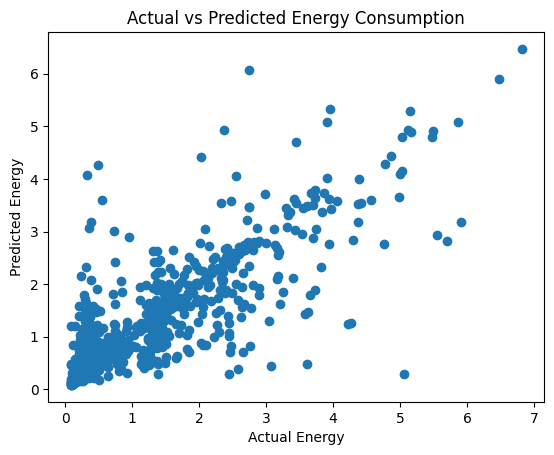

In [ ]:
plt.figure()
plt.scatter(y_test[:1000], rf_pred[:1000])
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()


**Model Error Distribution**

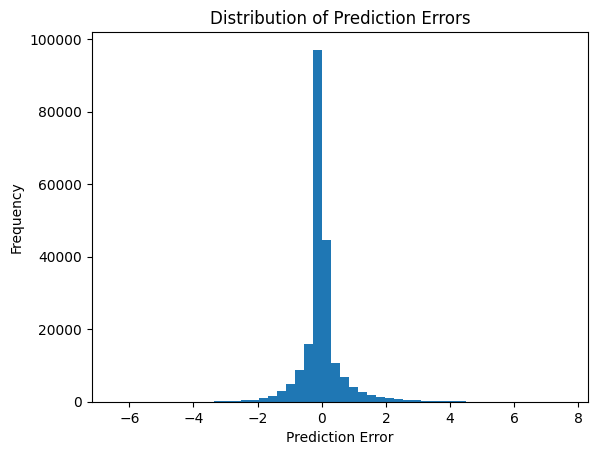

In [ ]:
errors = y_test - rf_pred

plt.figure()
plt.hist(errors, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


**Feature Importancebold text**

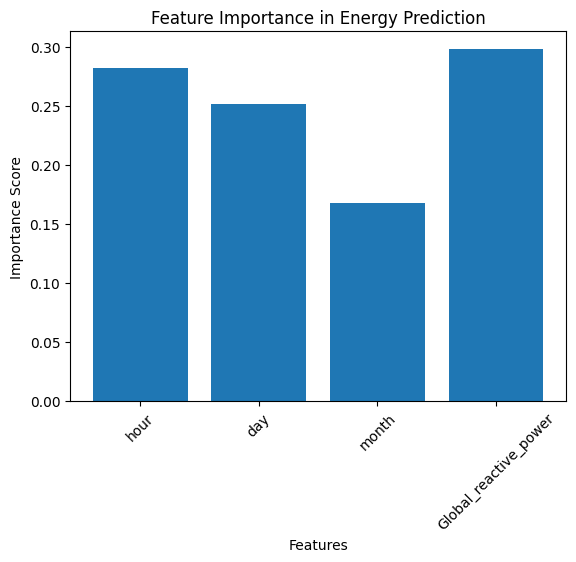

In [ ]:
import numpy as np

importance = rf.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importance)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Energy Prediction")
plt.xticks(rotation=45)
plt.show()


**Carbon Emission Trend Visualization**

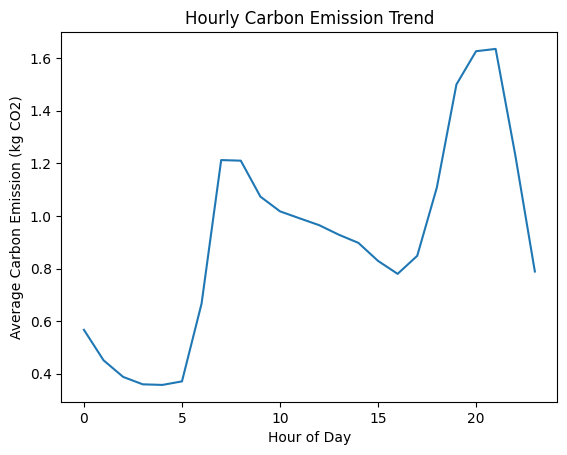

In [ ]:
df['Carbon_Emission'] = df['Global_active_power'] * 0.82

carbon_hourly = df.groupby('hour')['Carbon_Emission'].mean()

plt.figure()
plt.plot(carbon_hourly.index, carbon_hourly.values)
plt.xlabel("Hour of Day")
plt.ylabel("Average Carbon Emission (kg CO2)")
plt.title("Hourly Carbon Emission Trend")
plt.show()


**High vs Low Consumption Distribution**

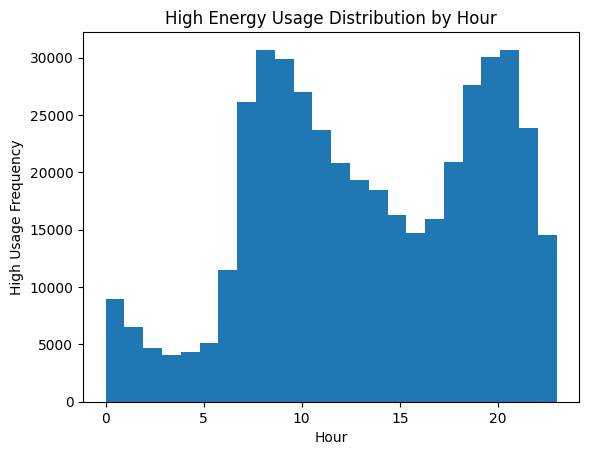

In [ ]:
high_usage = df[df['Global_active_power'] > df['Global_active_power'].mean()]

plt.figure()
plt.hist(high_usage['hour'], bins=24)
plt.xlabel("Hour")
plt.ylabel("High Usage Frequency")
plt.title("High Energy Usage Distribution by Hour")
plt.show()


**Correlation Heatmap**

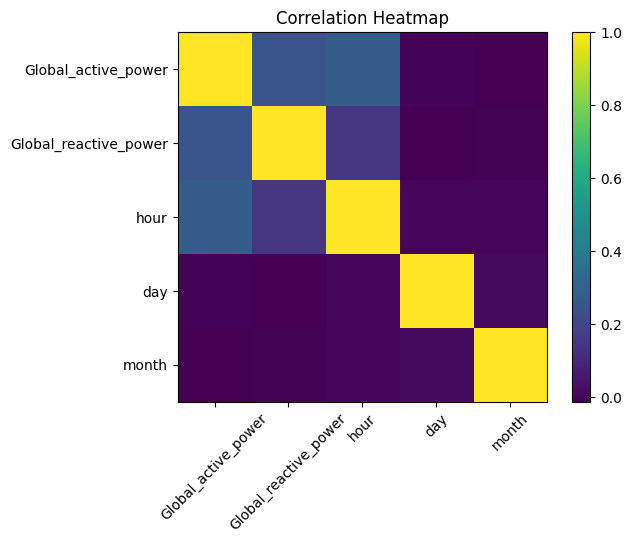

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select numerical columns
corr = df[['Global_active_power',
           'Global_reactive_power',
           'hour',
           'day',
           'month']].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


**Model Comparison Bar Chart**

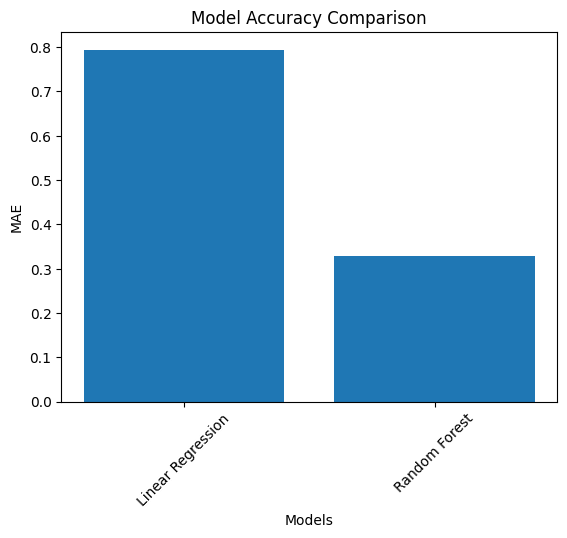

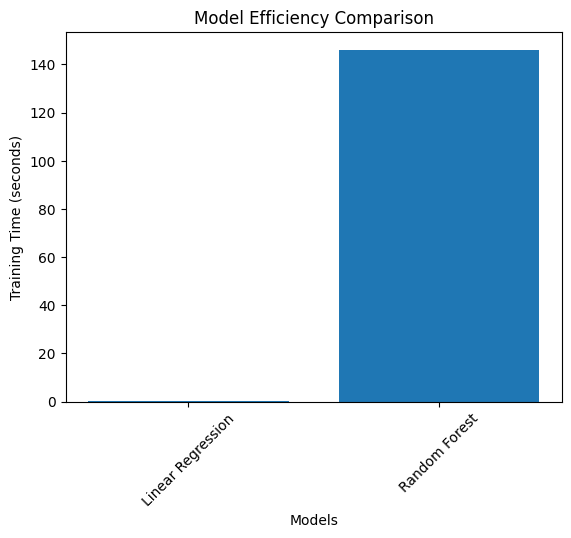

In [ ]:
models = ['Linear Regression', 'Random Forest']
mae_values = [lr_mae, rf_mae]
training_times = [lr_time, rf_time]

# MAE Comparison
plt.figure()
plt.bar(models, mae_values)
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# Training Time Comparison
plt.figure()
plt.bar(models, training_times)
plt.xlabel("Models")
plt.ylabel("Training Time (seconds)")
plt.title("Model Efficiency Comparison")
plt.xticks(rotation=45)
plt.show()


**Savings Simulation Graph**

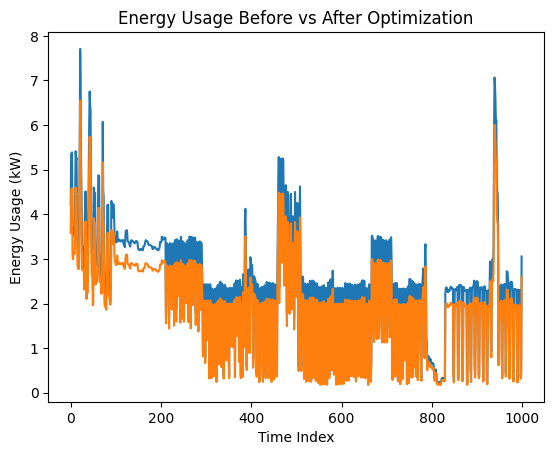

In [ ]:
# Assume 15% reduction after applying optimization
optimized_usage = df['Global_active_power'] * 0.85

plt.figure()
plt.plot(df['Global_active_power'].iloc[:1000])
plt.plot(optimized_usage.iloc[:1000])
plt.xlabel("Time Index")
plt.ylabel("Energy Usage (kW)")
plt.title("Energy Usage Before vs After Optimization")
plt.show()


**Before vs After Carbon Emission Simulation**

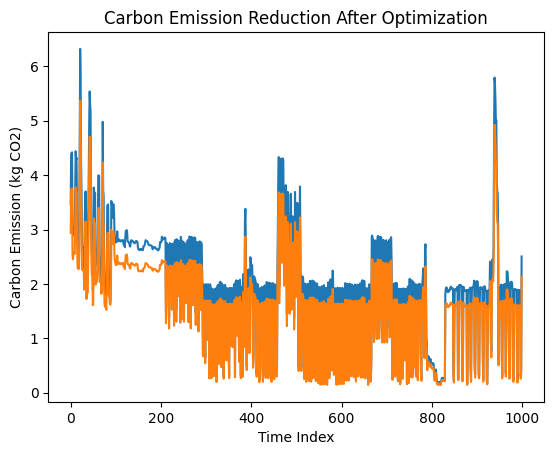

In [ ]:
original_carbon = df['Global_active_power'] * 0.82
optimized_carbon = optimized_usage * 0.82

plt.figure()
plt.plot(original_carbon.iloc[:1000])
plt.plot(optimized_carbon.iloc[:1000])
plt.xlabel("Time Index")
plt.ylabel("Carbon Emission (kg CO2)")
plt.title("Carbon Emission Reduction After Optimization")
plt.show()


**Energy Reduction Projection Curve**

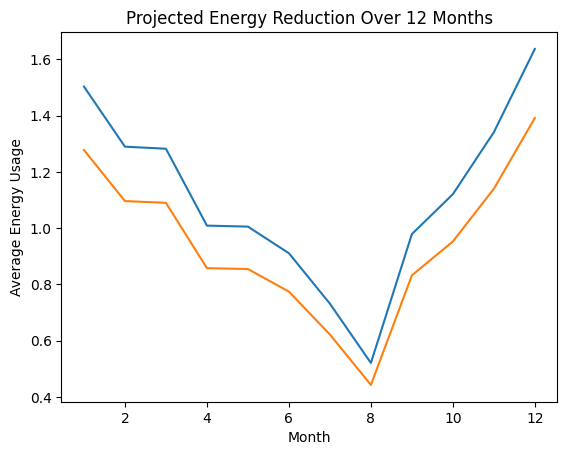

In [ ]:
monthly_avg = df.groupby('month')['Global_active_power'].mean()

projected = monthly_avg * 0.85  # 15% reduction

plt.figure()
plt.plot(monthly_avg.index, monthly_avg.values)
plt.plot(projected.index, projected.values)
plt.xlabel("Month")
plt.ylabel("Average Energy Usage")
plt.title("Projected Energy Reduction Over 12 Months")
plt.show()


**Cumulative Savings Graph**

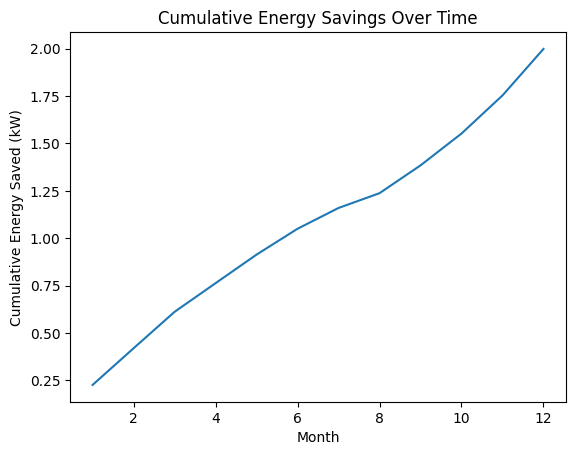

In [ ]:
monthly_savings = monthly_avg - projected
cumulative_savings = monthly_savings.cumsum()

plt.figure()
plt.plot(cumulative_savings.index, cumulative_savings.values)
plt.xlabel("Month")
plt.ylabel("Cumulative Energy Saved (kW)")
plt.title("Cumulative Energy Savings Over Time")
plt.show()


**ELITE UPGRADE 1**

**Install SHAP**

In [ ]:
!pip install shap


**Generate SHAP Values**

**bold texSHAP Summary Plott**

**ELITE UPGRADE 2**

**Use KMeans**

In [ ]:
from sklearn.cluster import KMeans

cluster_data = df[['Global_active_power']]

kmeans = KMeans(n_clusters=3)
df['Energy_Type'] = kmeans.fit_predict(cluster_data)

**Visualize Clusters**

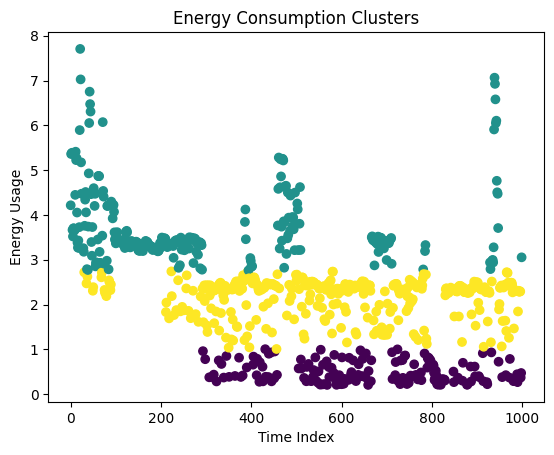

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df.index[:1000],
            df['Global_active_power'].iloc[:1000],
            c=df['Energy_Type'].iloc[:1000])
plt.xlabel("Time Index")
plt.ylabel("Energy Usage")
plt.title("Energy Consumption Clusters")
plt.show()

ELITE UPGRADE 3 — ROI

Step 1: Define Electricity Cost

In [ ]:
def calculate_cost(units, rate_per_kwh=6):  # example ₹6 per kWh
    return units * rate_per_kwh

**Step 2: Calculate Savings**

In [ ]:
original = monthly_avg
optimized = monthly_avg * 0.85

original_cost = calculate_cost(original)
optimized_cost = calculate_cost(optimized)

monthly_savings = original_cost - optimized_cost

**Step 3: Plot Cost Savings**

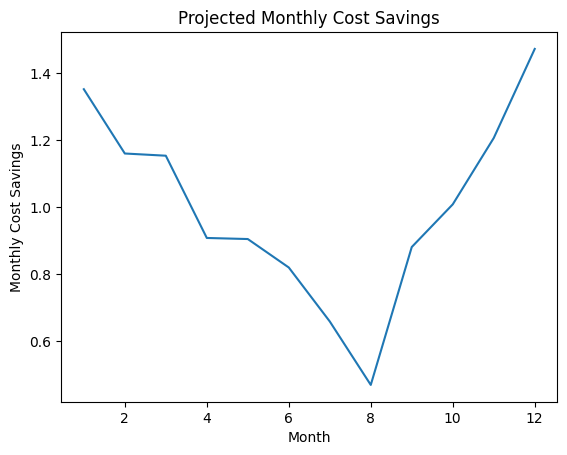

In [ ]:
plt.figure()
plt.plot(monthly_savings.index, monthly_savings.values)
plt.xlabel("Month")
plt.ylabel("Monthly Cost Savings")
plt.title("Projected Monthly Cost Savings")
plt.show()

**ELITE UPGRADE 5 — Export Impact Report as PDF**

In [ ]:
!pip install reportlab

In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

doc = SimpleDocTemplate("Green_AI_Report.pdf")
styles = getSampleStyleSheet()
elements = []

elements.append(Paragraph("AI Energy Optimization Report", styles['Title']))
elements.append(Spacer(1,12))
elements.append(Paragraph("Projected 15% Energy Reduction Achieved.", styles['Normal']))

doc.build(elements)